In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "../input/vegetable-image-dataset/Vegetable Images/train"
validation_path = "../input/vegetable-image-dataset/Vegetable Images/validation"
test_path = "../input/vegetable-image-dataset/Vegetable Images/test"

In [2]:
from matplotlib import image
from PIL import Image

def Load_Images(path):
    folders=os.listdir(path)
    data = []
    label = []
    print(folders)
    for i in folders:
        c=0
        images=os.listdir(path + '/' + i)
        for j in images:
            c+=1
            im=Image.open(path + '/' + i + '/' + j).convert('RGB')
            im=im.resize((227,227), image.NEAREST)
            #print(im.size)
            ar=np.array(im)
            #print(ar.shape)
            data.append(ar)
            if i=='Bean':
                label.append(i)
            elif i=='Bitter_Gourd':
                label.append(i)
            elif i=='Bottle':
                label.append(i)
            elif i=='Brinjal':
                label.append(i)
            elif i=='Broccoli':
                label.append(i)
            elif i=='Cabbage':
                label.append(i)
            elif i=='Capsicum':
                label.append(i)
            elif i=='Carrot':
                label.append(i)
            elif i=='Cauliflower':
                label.append(i)
            elif i=='Cucumber':
                label.append(i)
            elif i=='Papaya':
                label.append(i)
            elif i=='Potato':
                label.append(i)
            elif i=='Pumpkin':
                label.append(i)
            elif i=='Radish':
                label.append(i)
            else:
                label.append(i)
            #label.append(i)
            #print(c)
    t=pd.factorize(np.array(label))
    print(t)
    tgt=t[0]
    return np.array(data), tgt

In [3]:
x_train, y_train = Load_Images(train_path)
y_train = pd.Series(y_train)
print(x_train.shape)

['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato', 'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage', 'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato']
(array([ 0,  0,  0, ..., 14, 14, 14]), array(['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato',
       'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage',
       'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato'],
      dtype=object))
(15000, 227, 227, 3)


In [4]:
x_valid, y_valid = Load_Images(validation_path)
y_valid = pd.Series(y_valid)
print(x_valid.shape)

['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato', 'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage', 'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato']
(array([ 0,  0,  0, ..., 14, 14, 14]), array(['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato',
       'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage',
       'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato'],
      dtype=object))
(3000, 227, 227, 3)


In [5]:
name_list = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
index = 0
for i in name_list:
    y_train = y_train.replace(i, index)
    y_valid = y_valid.replace(i, index)
    index += 1

In [6]:
x_test, y_test = Load_Images(test_path)
y_test = pd.Series(y_test)
y_test = y_test.replace("Bean", 0)
y_test = y_test.replace("Bitter_Gourd", 1)
y_test = y_test.replace("Bottle_Gourd", 2)
y_test = y_test.replace("Brinjal", 3)
y_test = y_test.replace("Broccoli", 4)
y_test = y_test.replace("Cabbage", 5)
y_test = y_test.replace("Capsicum", 6)
y_test = y_test.replace("Carrot", 7)
y_test = y_test.replace("Cauliflower", 8)
y_test = y_test.replace("Cucumber", 9)
y_test = y_test.replace("Papaya", 10)
y_test = y_test.replace("Potato", 11)
y_test = y_test.replace("Pumpkin", 12)
y_test = y_test.replace("Radish", 13)
y_test = y_test.replace("Tomato", 14)

['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato', 'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage', 'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato']
(array([ 0,  0,  0, ..., 14, 14, 14]), array(['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato',
       'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage',
       'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato'],
      dtype=object))


In [7]:
# # 1. Train Set

# # rescale: 0과 1사이로 값을 변경함
# # ImageDataGenerator: 데이터 증식(augmentation)
# # ImageDataGenerator는 Noise삽입, 색상, 밝기 변형 등을 활용하여 실시간으로 데이터 증강을 사용하고, 
# # 텐서 이미지 데이터 배치를 생성하여 데이터 학습의 정확도를 높이는 역할을 한다.

# train_gen = ImageDataGenerator(rescale = 1./255.0) # Normalise the data

# # flow() 또는 flow_from_directory() 또는 flow_from_dataframe() 함수로 Numpy Array Iterator 객체를 만들어줌. 
# # 이 때, X(image) array, Y(label) array, 배치 사이즈, 데이터 셔플 유무를 설정.

# # 메타 데이터:  이미지 데이터 파일(jpg, jpeg)들과 해당 이미지들이 무슨 이미지를 나타내는지 텍스트로 표현한 문자열(cat, dog와 같은 문자열들)
# # flow_from_directory(): 메타 데이터가 담긴 디렉토리
# # target_size : 추후에 설계할 모델에 들어갈 인풋 이미지 사이즈 중 Width, Height를 입력
# # batch_size : 이미지 데이터 원본 소스에서 한 번에 얼마만큼의 이미지 데이터를 가져올 것인지
# # class_mode
# #    'categorical' : 'categorical_crossentropy' 처럼 멀티-레이블 클래스인데, 원-핫 인코딩된 형태
# #    'sparse' : 'sparse_categorical_crossentropy' 처럼 멀티-레이블 클래스인데, 레이블 인코딩된 형태
# #    'binary' : 'binary_crossentropy' 처럼 이진 분류 클래스로, 0 또는 1인 형태

# train_image_generator = train_gen.flow_from_directory(
#                                             train_path,
#                                             target_size=(224, 224),
#                                             batch_size=32,
#                                             class_mode='categorical')

# # 2. Validation Set
# val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
# val_image_generator = train_gen.flow_from_directory(
#                                             validation_path,
#                                             target_size=(224, 224),
#                                             batch_size=32,
#                                             class_mode='categorical')

# # 3. Test Set
# test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
# test_image_generator = train_gen.flow_from_directory(
#                                             test_path,
#                                             target_size=(224, 224),
#                                             batch_size=32,
#                                             class_mode='categorical')

In [8]:
# from keras.preprocessing import image
# # Call the function
# image_categories = os.listdir('../input/vegetable-image-dataset/Vegetable Images/train')

# def plot_images(image_categories):
#     # Create a figure
#     plt.figure(figsize=(12, 12))
#     for i, cat in enumerate(image_categories):
#         # Load images for the ith category
#         image_path = train_path + '/' + cat
#         images_in_folder = os.listdir(image_path)
#         first_image_of_folder = images_in_folder[0]
#         first_image_path = image_path + '/' + first_image_of_folder
#         img = image.load_img(first_image_path)
#         img_arr = image.img_to_array(img)/255.0

#         # Create Subplot and plot the images
#         plt.subplot(4, 4, i+1)
#         plt.imshow(img_arr)
#         plt.title(cat)
#         plt.axis('off')

#     plt.show()

# # Call the function
# plot_images(image_categories)

In [9]:
# from keras.models import Sequential 
# from keras.layers import Conv2D,Dense, Flatten, AveragePooling2D, Dropout 
# model = Sequential()

# model.add(Conv2D(6, kernel_size=(3, 3), activation='tanh', input_shape=x_train.shape[1:]))
# model.add(AveragePooling2D())
# Dropout(0.2)

# model.add(Conv2D(32, kernel_size=(3,3), activation='tanh'))
# model.add(AveragePooling2D())

# model.add(Conv2D(64, kernel_size=(3,3),activation='tanh'))

# model.add(Flatten())

# model.add(Dense(15, activation = 'softmax'))
# model.summary()

In [10]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [11]:
from keras.models import Sequential 
from keras.layers import Input,Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization, Activation, ZeroPadding2D
model = Sequential()

# 논문을 바탕으로 모델 구축함.
# 그러나 Computing power 한계로 인해 변경을 좀 했음.
# modeling
# input_shape = (227, 227, 3)  # 논문에서 제시된 shape

img_shape = x_train.shape[1:]

# CONV
# 레이어 1
model.add(Conv2D(filters=96, kernel_size=11, activation='relu', strides=4, padding='same',input_shape=img_shape))
model.add(MaxPooling2D((3,3), strides=2)) # overlapped pooling
model.add(BatchNormalization())

# 레이어 2
model.add(Conv2D(filters=256, kernel_size=5, activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D((3,3), strides=2))
model.add(BatchNormalization())

# 레이어 3
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=384, kernel_size=3, activation='relu', strides=1, padding='same'))

# 레이어 4
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=384, kernel_size=3, activation='relu', strides=1, padding='same'))

# 레이어 5
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D((3,3), strides=2))

# FC
# 레이어 6
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # 논문 parameter 0.5 이용함.

# 레이어 7
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# 레이어 8
model.add(Dense(1000, activation='softmax'))
model.summary()

2022-12-09 09:38:10.276110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 09:38:10.277056: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 09:38:10.429105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 09:38:10.430042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 09:38:10.430914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 57, 57, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 15, 15, 256)       0

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
from keras.callbacks import EarlyStopping
history = model.fit(x_train, y_train, epochs=60,  validation_data=(x_valid, y_valid))

2022-12-09 09:38:13.981468: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2318805000 exceeds 10% of free system memory.
2022-12-09 09:38:16.698263: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2318805000 exceeds 10% of free system memory.
2022-12-09 09:38:18.574985: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-12-09 09:38:20.617488: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


469/469 [==============================] - ETA: 0s - loss: 1.8925 - accuracy: 0.4587

2022-12-09 09:38:58.591460: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 463761000 exceeds 10% of free system memory.
2022-12-09 09:38:59.148836: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 463761000 exceeds 10% of free system memory.


469/469 [==============================] - 43s 68ms/step - loss: 1.8925 - accuracy: 0.4587 - val_loss: 2.1485 - val_accuracy: 0.4020
Epoch 2/60
469/469 [==============================] - 30s 64ms/step - loss: 0.8600 - accuracy: 0.7357 - val_loss: 1.3590 - val_accuracy: 0.6000
Epoch 3/60
469/469 [==============================] - 31s 65ms/step - loss: 0.6312 - accuracy: 0.8148 - val_loss: 0.6076 - val_accuracy: 0.8163
Epoch 4/60
469/469 [==============================] - 30s 65ms/step - loss: 0.5323 - accuracy: 0.8485 - val_loss: 0.7165 - val_accuracy: 0.7787
Epoch 5/60
469/469 [==============================] - 30s 64ms/step - loss: 0.4228 - accuracy: 0.8782 - val_loss: 0.4905 - val_accuracy: 0.8560
Epoch 6/60
469/469 [==============================] - 30s 64ms/step - loss: 0.4235 - accuracy: 0.8859 - val_loss: 0.4686 - val_accuracy: 0.8557
Epoch 7/60
469/469 [==============================] - 30s 64ms/step - loss: 0.3285 - accuracy: 0.9079 - val_loss: 1.4996 - val_accuracy: 0.6007
Epo

In [14]:
# hist = model.fit(train_image_generator, 
#                  epochs=20, 
#                  verbose=1, 
#                  validation_data=val_image_generator, 
#                  steps_per_epoch = 15000//24, 
#                  validation_steps = 3000//24)

# h = hist.history
# plt.style.use('ggplot')
# plt.figure(figsize=(10, 5))
# plt.plot(h['loss'], c='red', label='Training Loss')
# plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
# plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
# plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
# plt.xlabel("Number of Epochs")
# plt.legend(loc='best')
# plt.show()

# model.evaluate(test_image_generator)

In [15]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.892492,0.458667,2.148454,0.402000
1,0.859957,0.735667,1.358953,0.600000
2,0.631236,0.814800,0.607619,0.816333
3,0.532339,0.848467,0.716494,0.778667
4,0.422839,0.878200,0.490474,0.856000
5,0.423469,0.885933,0.468620,0.855667
6,0.328465,0.907933,1.499624,0.600667
7,0.343731,0.908133,0.594496,0.846667
8,0.287593,0.920800,0.438297,0.880333
9,0.289815,0.923733,0.459629,0.878000


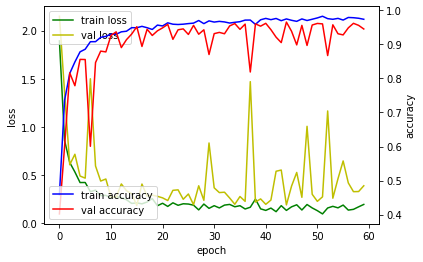

In [16]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'g', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'y', label = 'val loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'r', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')


loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [17]:
acc = model.evaluate(x_train, y_train)
print(acc)

2022-12-09 10:08:41.684632: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2318805000 exceeds 10% of free system memory.


469/469 [==============================] - 8s 17ms/step - loss: 0.1114 - accuracy: 0.9809
[0.11135153472423553, 0.9808666706085205]


In [18]:
y_pred=model.predict(x_test)
len(y_pred)

3000

In [19]:
def acc(_test, _y):
    Tp = 0
    Negative = 0
    cnt = 0
    for num in _test:
        if np.argmax(num) == _y[cnt]:
            Tp += 1
        else:
            Negative +=1
        cnt += 1
    print("맞춘 갯수: ", Tp)
    print("틀린 갯수: ", Negative)
    print("정확도: ", Tp/(Tp+Negative)*100, "%")

In [20]:
acc(y_pred, y_test)

맞춘 갯수:  2850
틀린 갯수:  150
정확도:  95.0 %


In [21]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = -1)

accuracy_score(y_test, y_pred)

0.95

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# confustion matrix(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.95      0.95       200\n           1       0.97      0.99      0.98       200\n           2       0.97      1.00      0.99       200\n           3       0.92      0.98      0.95       200\n           4       0.91      0.85      0.88       200\n           5       0.95      0.95      0.95       200\n           6       0.94      0.89      0.91       200\n           7       0.88      1.00      0.94       200\n           8       0.97      0.98      0.98       200\n           9       0.92      0.91      0.92       200\n          10       0.97      0.94      0.95       200\n          11       0.98      0.92      0.95       200\n          12       0.97      0.96      0.97       200\n          13       0.97      0.96      0.97       200\n          14       0.96      0.96      0.96       200\n\n    accuracy                           0.95      3000\n   macro avg       0.95      0.95      0.95      3000\nweigh

In [23]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0,1],[0,1],color='green',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

[ 0  0  0 ... 14 14 14]


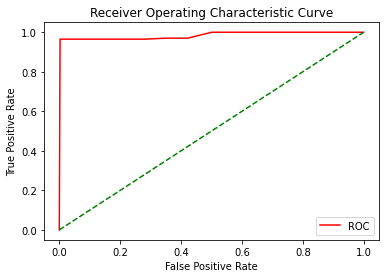

In [24]:
from sklearn.metrics import roc_curve

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)
print(y_pred)
fper, tper, thresholds = roc_curve(y_test, y_pred, pos_label=14)
plot_roc_curve(fper, tper)

In [25]:
classes = list(x_test)
test_classes = [classes[x] for x in y_test]

pred = tf.argmax(model.predict(x_test),axis=1)
pred_classes = [classes[x] for x in pred]

In [26]:
from sklearn.metrics import confusion_matrix
prediction = confusion_matrix(y_test, y_pred)

Text(114.0, 0.5, 'Predict')

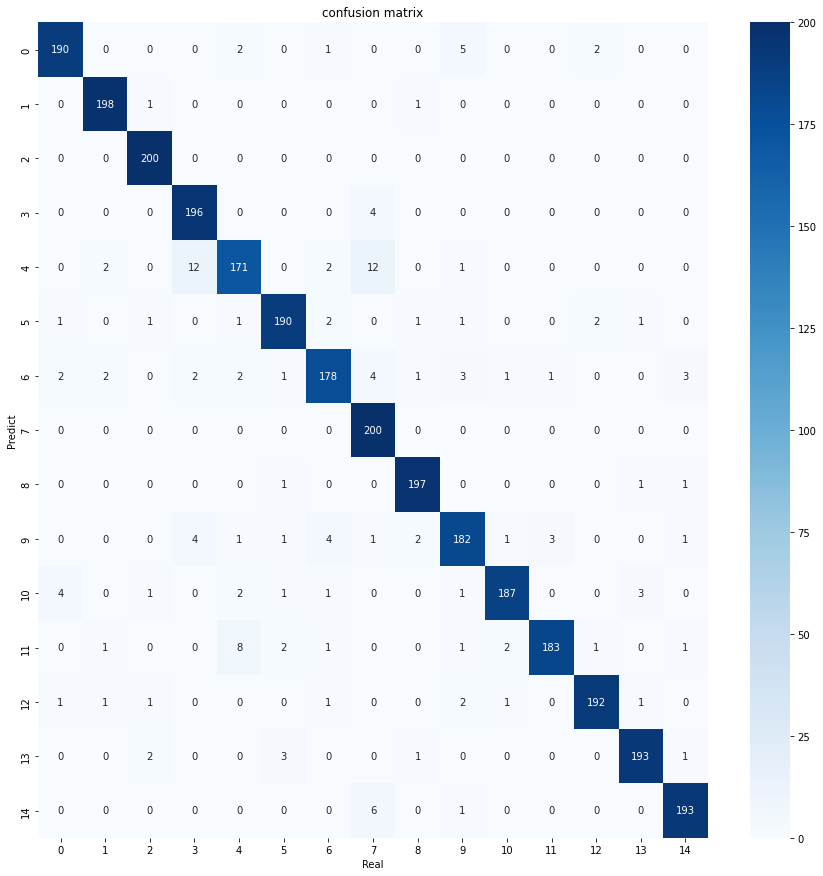

In [27]:
import seaborn as sns
m = pd.DataFrame(prediction, index=[i for i in range(len(prediction[0]))], columns = [i for i in range(len(prediction[0]))])
plt.figure(figsize=(15,15))
plt.title("confusion matrix")
cnn_matric = sns.heatmap(m, annot=True, fmt='d', cmap='Blues')
cnn_matric.set_xlabel('Real')
cnn_matric.set_ylabel('Predict')